In [13]:
# from netCDF4 import Dataset
import numpy as np
# import pandas as pd
from scipy import stats
# import scipy.signal as sg
import matplotlib.pyplot as plt
import pickle
import matplotlib.cm as cm

plt.rcParams.update({'font.size': 14})

### BVF

In [2]:
with open('../support_data/bvs_lucky.pkl', 'rb') as f:
    ambient_stratification = pickle.load(f)

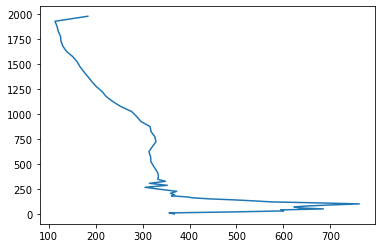

In [3]:
plt.plot(ambient_stratification['BVF']*3600*24, ambient_stratification['z'])

In [4]:
def lucky_bvf(z_i):
    with open('../support_data/bvs_lucky.pkl', 'rb') as f:
        ambient_stratification = pickle.load(f)
        
    z_lucky = ambient_stratification['z']
    bvf = ambient_stratification['BVF']
    
    aux = abs(z_lucky - z_i)
    
    jj = np.where(aux == np.amin(aux))
    #print(bvf[jj].data[0])
    bvf_lucky = bvf[jj].data[0] #s^-1 
    return bvf_lucky

In [5]:
lucky_bvf(1500)

0.0019233627216731681

### Power Spectra

In [6]:
with open('../support_data/PowerSpectra/psd_rbr_2013', 'rb') as f:
    PowerSpectra= pickle.load(f)

In [11]:
# upper_tick_locations = np.array([M2, M4, M6, f, week, month, yearly])
# upper_tick_labels = ['M2', 'M4', 'M6', 'f', 'week', 'month', 'year']

z_min = min(PowerSpectra.keys())
z_max = max(PowerSpectra.keys())
print(z_min, z_max)
N_z_min = lucky_bvf(z_min)*3600*24
N_z_max = lucky_bvf(z_max)*3600*24
print(N_z_min, N_z_max)

upper_tick_locations = np.array([N_z_min, N_z_max, M2, M4, M6, f, week, month, yearly])
upper_tick_labels = ['$N_{max}$', '$N_{min}$','M2', 'M4', 'M6', 'f', 'week', 'month', 'year']

upper_tick_locations

1100.0 1660.0
253.6197099260581 130.30823283507047


array([2.53619710e+02, 1.30308233e+02, 1.93236715e+00, 3.86473430e+00,
       5.79710145e+00, 1.21151396e+00, 1.42857143e-01, 3.33333333e-02,
       2.73972603e-03])

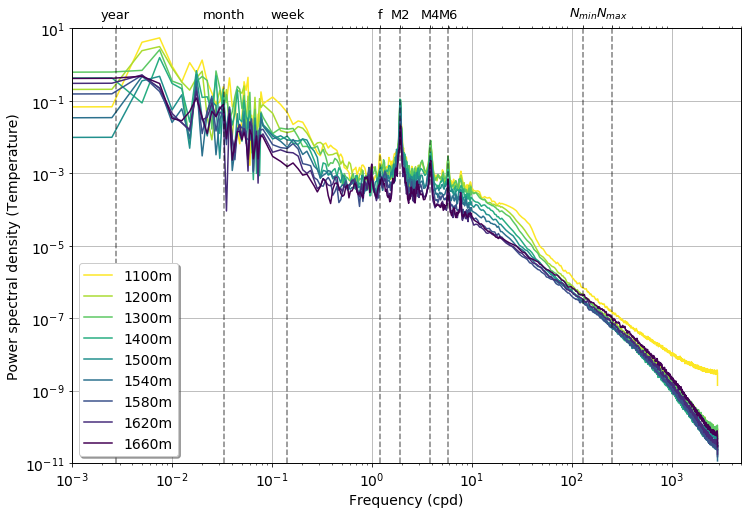

In [39]:
x_colors = np.linspace(0,1, len(PowerSpectra.keys()))
colors = cm.get_cmap('viridis_r')(x_colors)

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

for j, depth in enumerate(sorted(PowerSpectra.keys())):
    ax1.loglog(PowerSpectra[depth]['freq'], 
               PowerSpectra[depth]['psd'], 
               label=f"{depth:0.0f}m",
            c=colors[j])

ax2.loglog(PowerSpectra[depth]['freq'], PowerSpectra[depth]['psd'], alpha=0)

for typical_freq in upper_tick_locations:
    ax1.axvline(typical_freq, color='k', alpha=0.5, ls='--')

ax1.grid()
ax1.set_xlabel('Frequency (cpd)', fontsize=14)
ax1.set_ylabel('Power spectral density (Temperature)', fontsize=14)
ax1.set_xlim(1e-3, 5e3)
ax1.set_ylim(1e-11,1e1)
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(upper_tick_locations)
ax2.set_xticklabels(upper_tick_labels, fontsize=13)
ax1.legend(loc='lower left', shadow=True)
#### SAVE THIS ####

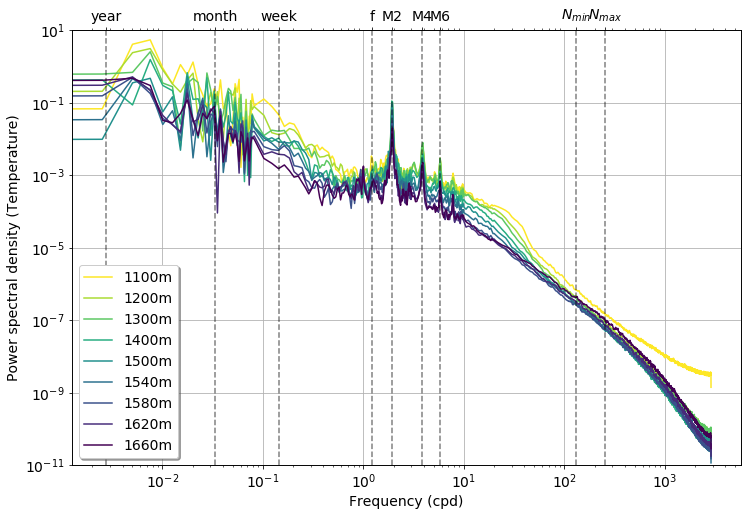

In [21]:
x_colors = np.linspace(0,1, len(PowerSpectra.keys()))
colors = cm.get_cmap('viridis_r')(x_colors)

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

for j, depth in enumerate(sorted(PowerSpectra.keys())):
    ax1.loglog(PowerSpectra[depth]['freq'], PowerSpectra[depth]['psd'], 
               label=f"{depth:0.0f}m", c=colors[j])

ax2.loglog(PowerSpectra[depth]['freq'], PowerSpectra[depth]['psd'], alpha=0)

for typical_freq in upper_tick_locations:
    ax1.axvline(typical_freq, color='k', alpha=0.5, ls='--')

ax1.grid()
ax1.set_xlabel('Frequency (cpd)', fontsize=14)
ax1.set_ylabel('Power spectral density (Temperature)', fontsize=14)
ax1.set_ylim(1e-11,1e1)
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(upper_tick_locations)
ax2.set_xticklabels(upper_tick_labels)
ax1.legend(loc='lower left', shadow=True)
plt.savefig()
#### SAVE THIS ####

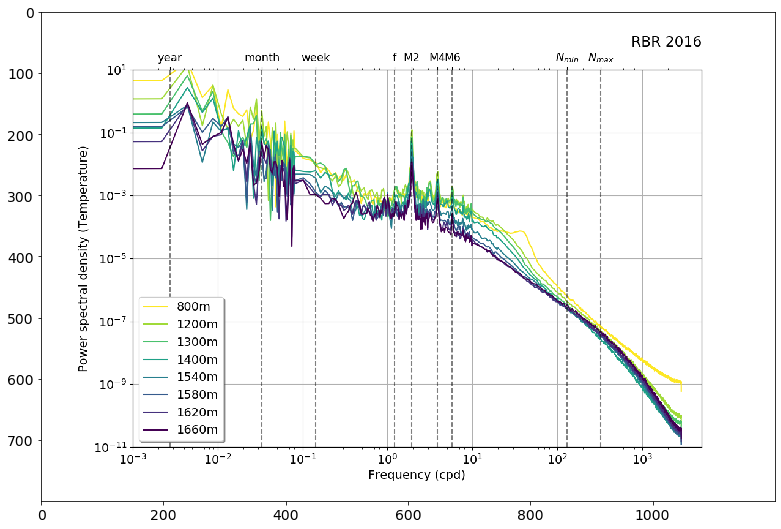

In [44]:
import matplotlib.image as mpimg
img=mpimg.imread('figures/depths/rbr/PSD_temp_rbr_2016.png')
plt.figure(figsize=(15,9))
imgplot = plt.imshow(img)
plt.show()

TypeError: Image data of dtype <U40 cannot be converted to float

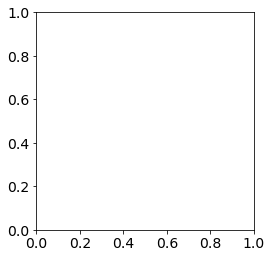

In [41]:
plt.imshow()